In [2]:
# install missing packets in jupyter notebook
!pip install cmdstanpy
!pip install arviz
!pip install scipy
!pip install ipywidgets widgetsnbextension pandas-profiling

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Modeling prior predictive distribution

In [6]:
# task 1-5
number_of_trials = 50
gen_quant = CmdStanModel(stan_file='code_1.stan')
samples = gen_quant.sample(data={'N':number_of_trials}, 
                           fixed_param=True, 
                           iter_sampling=1000, 
                           iter_warmup=0, 
                           chains = 1)

# Without data block
# samples = gen_quant.sample(fixed_param=True, 
#                            iter_sampling=1000, 
#                            iter_warmup=0, 
#                            chains = 1)

df = samples.draws_pd()
print(df.head())

INFO:cmdstanpy:compiling stan file /usr/data-analytics-lectures/Data Analytics/Lab 3/code_1.stan to exe file /usr/data-analytics-lectures/Data Analytics/Lab 3/code_1
INFO:cmdstanpy:compiled model executable: /usr/data-analytics-lectures/Data Analytics/Lab 3/code_1
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.



   lp__  accept_stat__     y         p
0   0.0            0.0   6.0  0.101639
1   0.0            0.0   7.0  0.153593
2   0.0            0.0  12.0  0.239437
3   0.0            0.0   9.0  0.184703
4   0.0            0.0  10.0  0.150745


   lp__  accept_stat__     y         p
0   0.0            0.0   6.0  0.101639
1   0.0            0.0   7.0  0.153593
2   0.0            0.0  12.0  0.239437
3   0.0            0.0   9.0  0.184703
4   0.0            0.0  10.0  0.150745


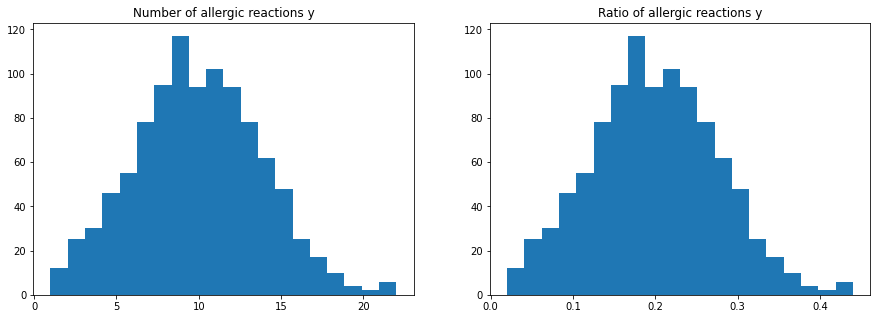

Mean of y:  10.041
Mean of ratio:  0.20082000000000003


In [13]:
# task 6-7
df = samples.draws_pd()
print(df.head())

fig, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].hist(df["y"], bins=20)
axs[0].set_title("Number of allergic reactions y")
ratio = df["y"]/number_of_trials
axs[1].hist(ratio, bins=20)
axs[1].set_title("Ratio of allergic reactions y")
plt.show()

print("Mean of y: ", df["y"].mean())
print("Mean of ratio: ", ratio.mean())

In [ ]:
## Excercise 2 -  Modeling posterior and posterior predictive distribution
